# Ejemplos de convolución y la integral de convolución

La convolución de dos señales es una operación fundamental en el procesamiento de señales. 
Principalmente, porque la salida de cualquier sistema lineal invariante en el tiempo (LTI) viene dada por la convolución de su respuesta de impulso con la señal de entrada. 
Otra aplicación importante de la convolución es el teorema de la convolución, que establece que la multiplicación en el dominio del tiempo corresponde a la convolución en el dominio de la frecuencia y viceversa.

Formalmente, la convolución $(f_1 \times f_2)(t)$ de dos señales $f_1 (t)$ y $f_2(t)$ está definida por la integral de convolución $(F1∗F2)(t)$ de dos señales $F1(t)$ y $F2(t)$ está definida por la integral de convolución

$$(f_1 \times f_2)(t) = \int_{- \infty}^{\infty} f_1 (\tau) f_2(t-\tau) d\tau$$


Entonces, la convolución de dos funciones es la integral sobre el producto de ambas funciones, donde una función se desplaza en el tiempo y se invierte en el tiempo. No pensemos en por qué esta operación tiene sentido por ahora. 
En su lugar, definamos dos funciones $f_1(t)$ y $f_2(t)$




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import time

%matplotlib inline 

params = {'legend.fontsize': 14,
          'figure.figsize': (10, 8),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
plt.rcParams.update(params)



def showConvolution(f1, f2, t, t0):
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        #scipy.integrate.simps(prod(t), t):
        #Integrate y(x) using samples along the given axis 
        #and the composite Simpson’s rule. 
        #If x is None, spacing of dx is assumed.
        convolution[n] = scipy.integrate.simps(prod(t), t)

    # Create the shifted and flipped function
    f_shift = lambda t: f2(t0-t)
    prod    = lambda tau: f1(tau) * f2(t0-tau)

    # Plot the curves
    plt.gcf().clear() # il

    plt.subplot(211)
    plt.gca().set_ymargin(0.05) # il
    plt.plot(t, f1(t)     , label=r'$f_1(\tau)$')
    plt.plot(t, f_shift(t), label=r'$f_2(t_0-\tau)$')
    plt.fill(t, prod(t), color='r', alpha=0.5, edgecolor='black', hatch='//') # il
    plt.plot(t, prod(t), 'r-', label=r'$f_1(\tau)f_2(t_0-\tau)$')
    plt.grid(True); 
    plt.xlabel(r'$\tau$'); 
    plt.ylabel(r'$x(\tau)$') # il
    plt.legend(fontsize=10) # il
    plt.text(-4, 0.6, '$t_0=%.2f$' % t0, bbox=dict(fc='white')) # il

    # plot the convolution curve
    plt.subplot(212)
    plt.gca().set_ymargin(0.05) # il
    plt.plot(t, convolution, label='$(f_1 * f_2)(t)$')

    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    plt.plot(t0, current_value, 'ro')  # plot the point
    plt.grid(True); 
    plt.xlabel('$t$'); 
    plt.ylabel('$(f_1 * f_2)(t)$') # il
    plt.legend(fontsize=10) # il
    #plt.show() # il


 
    


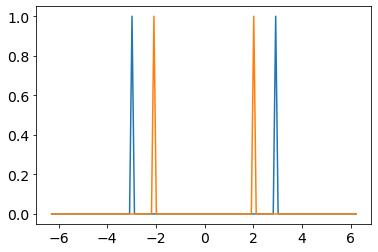

In [2]:

%matplotlib inline 

Fs = 10  # our sampling frequency for the plotting
T  = np.pi*2    # the time range we are interested in
t  = np.arange(-T, T, 1/Fs)  # the time samples

# cuadrada en plano positivo y negativo
f1 = lambda t: (t>-3)*(t<-2.9) + (t>2.9)*(t<3)
f2 = lambda t: (t>-2.1)*(t<-2) + (t>2)*(t<2.1)

# triangular
#f2 = lambda t: np.maximum(0, 1-abs(t)*2)
# exponencial
#f2 = lambda t: (t>0) * np.exp(-t/0.5)

plt.plot(t,f1(t))
plt.plot(t,f2(t))
plt.show()


<IPython.core.display.Javascript object>


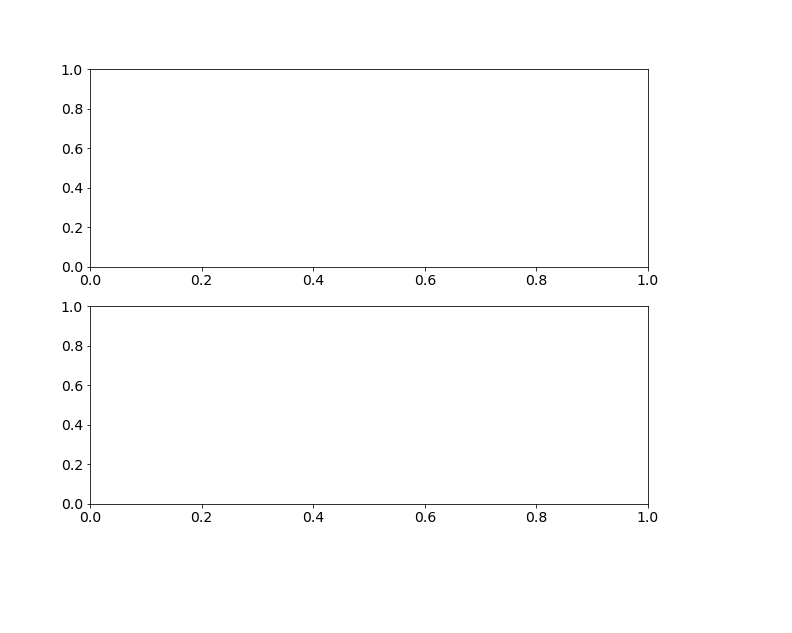

AttributeError: 'NoneType' object has no attribute 'dpi_scale_trans'

In [3]:
%matplotlib notebook 

fig, ax = plt.subplots()  
plt.subplot(211)
plt.subplot(212)
plt.ion()

fig.show()
fig.canvas.draw()

for i in t: #
    ax.clear()
    showConvolution(f1, f2, t, i)
    fig.canvas.draw()
    
